# Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
import tensorflow as tf
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Colab Notebooks/'

Mounted at /content/drive


# Data Loading

## loading

In [ ]:
def load_datasets():
  # load the datasets and return them
  print('loading started...')
  train = pd.read_csv(drive_path + 'datasets/titanic/train.csv')
  test = pd.read_csv(drive_path + 'datasets/titanic/test.csv')
  gender_submission = pd.read_csv(drive_path + 'datasets/titanic/gender_submission.csv')
  print('loading done!')
  return train, test, gender_submission

train, test, genderSubmission = load_datasets()

loading started...
loading done!


In [ ]:
train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x))

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
genderSubmission.head()

# Data Manipulation

In [ ]:
men = train[train['Sex']=='male']
men_survived = train.query("Sex == 'male' and Survived == 1 ")
women = train[train['Sex']=='female']
women_survived = train.query("Sex == 'female' and Survived == 1")

## Gender and Age impacts

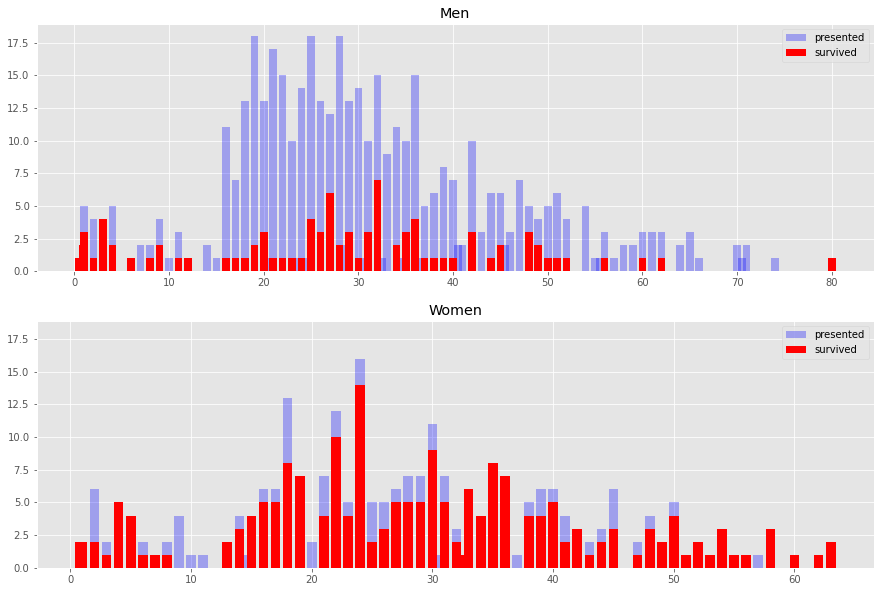

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(15,10))
ax1.bar(men.Age.value_counts().keys(), men.Age.value_counts(), label='presented', color='b', alpha=0.3)
ax1.bar(men_survived.Age.value_counts().keys(), men_survived.Age.value_counts(), label='survived',color='r', alpha=1)
ax1.set_title('Men')
ax1.legend()
ax2.bar(women.Age.value_counts().keys(), women.Age.value_counts(), label='presented', color='b', alpha=0.3)
ax2.bar(women_survived.Age.value_counts().keys(), women_survived.Age.value_counts(), label='survived', color='r', alpha=1)
ax2.set_title('Women')
plt.legend()

## Ticket Class Impacts

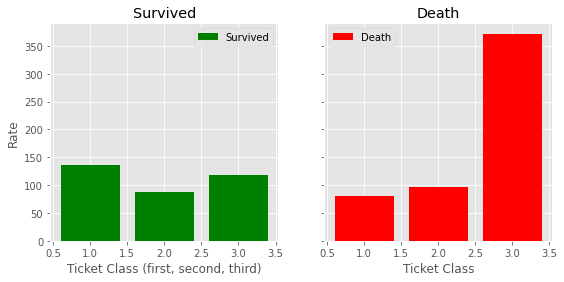

In [ ]:
pclass_survived = train[train['Survived']==1].Pclass.value_counts()
pclass_death = train[train['Survived']==0].Pclass.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,4))
ax1.bar(pclass_survived.keys(), pclass_survived, label='Survived', color='g', alpha=1)
ax1.set_title('Survived')
ax1.set_xlabel('Ticket Class (first, second, third)')
ax1.set_ylabel('Rate')
ax1.legend()
ax2.bar(pclass_death.keys(), pclass_death, label='Death', color='r', alpha=1)
ax2.set_title('Death')
ax2.set_xlabel('Ticket Class')
plt.legend()

## Sibiling and spouse impacts

In [ ]:
sibsp_survived = train[train['Survived']==1].SibSp.value_counts()
sibsp_death = train[train['Survived']==0].SibSp.value_counts()

In [ ]:
sibsp_survived.sort_index()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [ ]:
sibsp_death.sort_index()

0    398
1     97
2     15
3     12
4     15
5      5
8      7
Name: SibSp, dtype: int64

## Parent and Children Impacts

In [ ]:
parch_survived = train[train['Survived']==1].Parch.value_counts()
parch_death = train[train['Survived']==0].Parch.value_counts()
parch_survived.sort_index()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [ ]:
parch_death.sort_index()

0    445
1     53
2     40
3      2
4      4
5      4
6      1
Name: Parch, dtype: int64

## FacetGrid

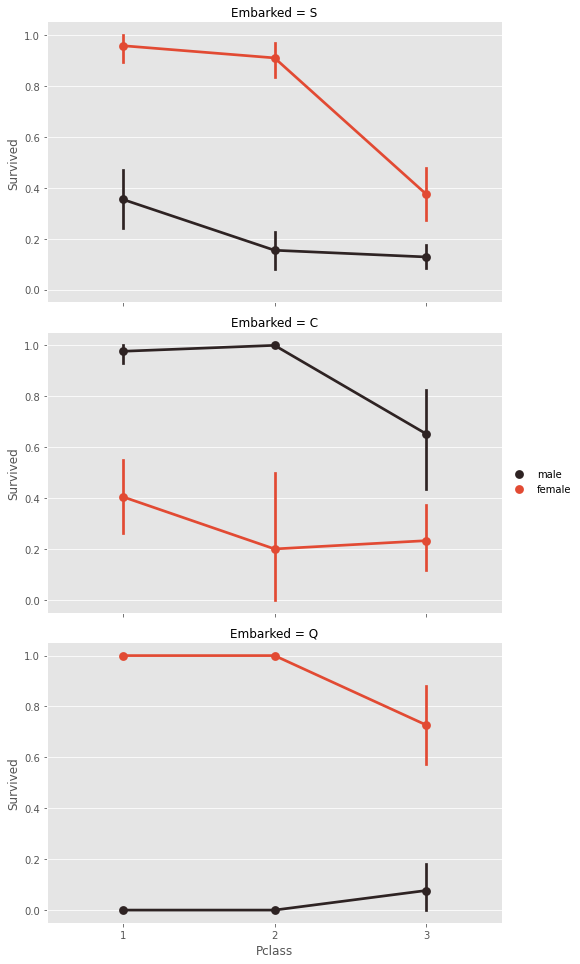

In [ ]:
FacetGrid = sns.FacetGrid(train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

## Cabin

In [ ]:
train['Cabin'].value_counts()

8.0    687
3.0     59
2.0     47
4.0     33
5.0     32
1.0     15
6.0     13
7.0      4
U        1
Name: Cabin, dtype: int64

In [ ]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U")
    dataset['Cabin'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Cabin'] = dataset['Cabin'].map(deck)
    #dataset['Cabin'] = dataset['Cabin'].fillna(0)
    #dataset['Cabin'] = dataset['Cabin'].astype(int)

## Pre-process the dataset

In [ ]:
y_train = test.merge(genderSubmission, how='inner', on='PassengerId')
test_df = y_train.copy()
X_test = train['Survived']
y_test = y_train['Survived']
X_train = train[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = y_train[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [ ]:
def preprocess(dataframe):
  dataframe["Pclass"] = dataframe["Pclass"].astype(float)
  dataframe["SibSp"] = dataframe["SibSp"].astype(float)
  dataframe["Parch"] = dataframe["Parch"].astype(float)
  dataframe['Sex'] = dataframe['Sex'].str.replace('female','1')
  dataframe['Sex'] = dataframe['Sex'].str.replace('male','0')
  dataframe["Sex"] = dataframe["Sex"].astype(float)
  dataframe['Embarked'] = dataframe['Embarked'].str.replace('C', '1')
  dataframe['Embarked'] = dataframe['Embarked'].str.replace('Q', '2')
  dataframe['Embarked'] = dataframe['Embarked'].str.replace('S', '3')
  dataframe["Embarked"] = dataframe["Embarked"].astype(float)
  dataframe = dataframe.fillna(1.1)
  return dataframe

X_train = preprocess(X_train)
y_train = preprocess(y_train)

In [ ]:
y_test.isnull().sum()

0

# Defining the model

In [ ]:
n_features = X_train.shape[1]
model = Sequential()
model.add(Input(shape=(n_features,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()
model.fit(X_train, X_test, epochs=100, batch_size=30)
loss, acc = model.evaluate(y_train, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Epoch 1/100
30/30 [==============================] - 1s 3ms/step - loss: 0.8110 - accuracy: 0.6734
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6678
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.6936
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6925
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.7037
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5763 - accuracy: 0.6970
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.6981
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7037
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7172
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7205
Epoch 11/

# Results

In [ ]:
for i in range(0, 50):
  y_prob = model.predict(y_train.iloc[[i]])
  y_prob = y_prob[0]*100
  #print(y_prob)
  value = test_df.iloc[i]['Survived']
  if y_prob>50:
    predicted = 1
  else:
    predicted = 0
  print(f'predicted label is: {predicted} ---> original answer is: {value}')
  

predicted label is: 0 ---> original answer is: 0
predicted label is: 0 ---> original answer is: 1
predicted label is: 0 ---> original answer is: 0
predicted label is: 0 ---> original answer is: 0
predicted label is: 1 ---> original answer is: 1
predicted label is: 0 ---> original answer is: 0
predicted label is: 1 ---> original answer is: 1
predicted label is: 0 ---> original answer is: 0
predicted label is: 1 ---> original answer is: 1
predicted label is: 0 ---> original answer is: 0
predicted label is: 0 ---> original answer is: 0
predicted label is: 0 ---> original answer is: 0
predicted label is: 1 ---> original answer is: 1
predicted label is: 0 ---> original answer is: 0
predicted label is: 1 ---> original answer is: 1
predicted label is: 1 ---> original answer is: 1
predicted label is: 0 ---> original answer is: 0
predicted label is: 0 ---> original answer is: 0
predicted label is: 1 ---> original answer is: 1
predicted label is: 0 ---> original answer is: 1
predicted label is: 

# To Submit Kaggle

In [ ]:
n_features = X_train.shape[1]
model_s = Sequential()
model_s.add(Input(shape=(n_features,)))
model_s.add(Dense(16, activation='relu'))
model_s.add(Dense(1, activation='sigmoid'))
model_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()
model_s.fit(X_train, X_test, epochs=100, batch_size=30)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 3.8240 - accuracy: 0.4456
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 1.3746 - accuracy: 0.5264
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8223 - accuracy: 0.6543
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.6554
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7215 - accuracy: 0.6510
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6554
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.6723
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.6846
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.6813
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6824
Epoch 11/

In [ ]:
submit_list = []
for i in range(0, len(y_train)):
  y_prob = model_s.predict(y_train.iloc[[i]])
  y_prob = y_prob[0]*100
  if y_prob>50:
    predicted = 1
  else:
    predicted = 0
  submit_list.append(predicted)

In [ ]:
submitDataframe = pd.DataFrame()
submitDataframe['PassengerId'] = test['PassengerId']
submitDataframe['Survived'] = submit_list
submitDataframe.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submitDataframe.to_csv('submit.csv', index=False)